Here, i am gonna do one sample t-test for mean. This is used to compare the sample mean and population mean.

t-test is used when the sample size is less than 30, and the population variance is unknown.The assumption made is that the data is independent, normally distributed and collected randomly. 

There are 3 variables that we have to address to our function, that I call onesample_t_test

1. Confidence level (q = 0.975 is usually used)

2. Degree of freedom, for this test it is usually DoF = N - 1

3. The mean for population (given that we know the mean of population)

The hypothesis made are as follows:

Null hypothesis H0 : mean of sample = mean of population

Alternate hypothesis H1 : mean of sample != mean of population

< How to use >

1. FIll in the data = [  ]
2. In onesample_t_test function, fill in the confidence level (in two tails usually used is 0.975), degree of freedom and the mean of population

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def onesample_t_test(crit_value, degree_freedom , population_mean):
    t_stats =  ( np.mean(data) - population_mean ) /  ( np.std(data , ddof = 1 ) ) * ( len(data) ** 0.5 ) 
    print(f'T-stats is {t_stats}')
    t_critical = stats.t.ppf(q=crit_value , df=degree_freedom)
    print(f'T-critical is {t_critical}')
    if abs(t_stats) > abs(t_critical): 
        print('null hypothesis is rejected')
    else:
        print('null hypothesis is adopted')
    onesample_t_test.t_stats = t_stats
    onesample_t_test.t_critical = t_critical

In [3]:
data = [128,118,144,133,132,111,149,139,136,126,127,115,142,140,131,132,122,119,129,128]
onesample_t_test(0.975, 19, 120)

T-stats is 4.512403659336718
T-critical is 2.093024054408263
null hypothesis is rejected


How about we visualize our data? 

I use seaborn package to make visualization of data.

To visualize:
1. Use histogram to see the distribution of data
2. Use sns.kdeplot to make probability density curve(*)

(*)  A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

<Axes: ylabel='Density'>

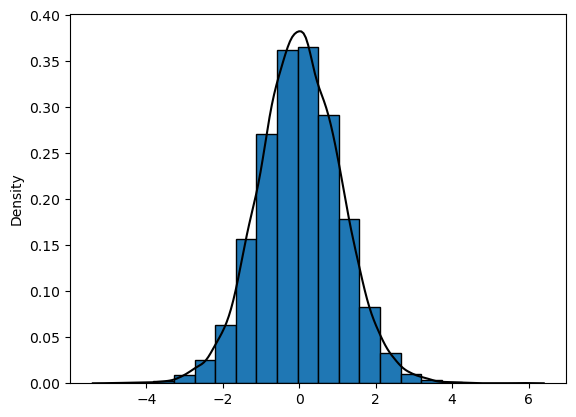

In [3]:
x = stats.t.rvs(df =19 , size=10000)
plt.hist(x, density = True, edgecolor = 'black',bins = 20)
import seaborn as sns
sns.kdeplot(x, color = 'black')

Text(0, 0.5, 'density')

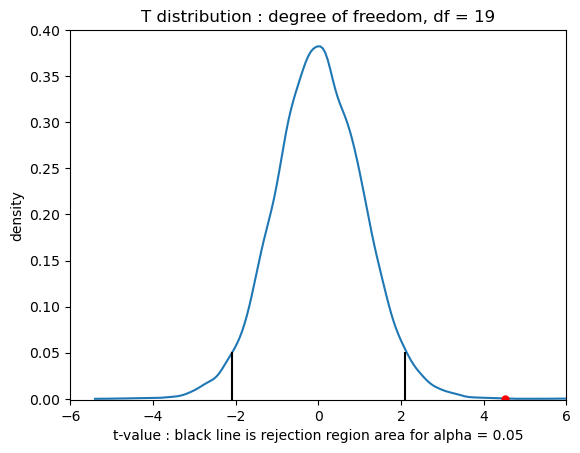

In [4]:
import seaborn as sns
sns.kdeplot(x)
plt.plot([onesample_t_test.t_critical,onesample_t_test.t_critical],[0,0.05],'k-')
plt.plot([-(onesample_t_test.t_critical),-(onesample_t_test.t_critical)],[0,0.05],'k-')
plt.plot(onesample_t_test.t_stats, 0, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.xlim(-6,6)
plt.ylim(-0.001,0.40)
plt.title('T distribution : degree of freedom, df = 19')
plt.xlabel('t-value : black line is rejection region area for alpha = 0.05')
plt.ylabel('density')

Our t-value = 4.51 is higher than t-critical = 2.09

The t-value fall into rejected area. So the null hypothesis is rejected

We can say that (in this case) with 95% confidence level that the sample mean is higher than population mean